# Prediction of Mobile Phone Price Using a Regression Model

# Background and Dataset

Modern smartphones boast a myriad of features, ranging from processing capabilities and memory storage to camera quality and display resolution. Each of these attributes contributes uniquely to the overall user experience and, consequently, influences the device's price tag.

![Mobile Phone](Everyday-IP_Spreading-the-word-about-mobile-phones_12.webp)

## Dataset

Mobile price depends on various factors such as resolution, brand, size, weight, imaging quality, RAM, battery, and CPU power. In this dataset, we aim to estimate the price of mobile phones using the above features. The dataset is available at https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction.



In [19]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from scipy.stats import t
import math

# Read the CSV file
data = pd.read_csv("Cellphone.csv")
# Drop the Product_id column and assign the result back to the original DataFrame
data = data.drop(columns=['Product_id'])

data.head()


,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [20]:
data.info

<bound method DataFrame.info of      Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  internal mem  \
0     2357    10   135.0         5.20  424         8     1.350          16.0   
1     1749    10   125.0         4.00  233         2     1.300           4.0   
2     1916    10   110.0         4.70  312         4     1.200           8.0   
3     1315    11   118.5         4.00  233         2     1.300           4.0   
4     1749    11   125.0         4.00  233         2     1.300           4.0   
..     ...   ...     ...          ...  ...       ...       ...           ...   
156   3551  4638   178.0         5.46  538         4     1.875         128.0   
157   3211  8016   170.0         5.50  534         4     1.975         128.0   
158   3260  8809   150.0         5.50  401         8     2.200          64.0   
159   3211  8946   170.0         5.50  534         4     1.975         128.0   
160   2536  9807   202.0         6.00  367         8     1.500          16.0   

       

In [21]:
data.describe()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


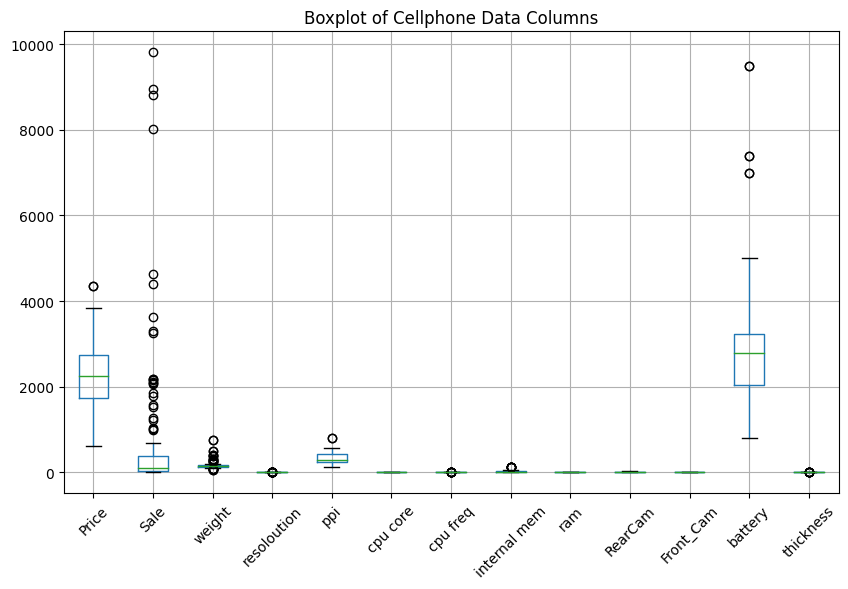

Price: 1.24%
Sale: 14.91%
weight: 14.91%
resoloution: 16.15%
ppi: 1.24%
cpu core: 0.00%
cpu freq: 6.21%
internal mem: 4.97%
ram: 0.00%
RearCam: 0.00%
Front_Cam: 0.00%
battery: 3.73%
thickness: 4.97%


In [22]:
import matplotlib.pyplot as plt

# Plot boxplots
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Boxplot of Cellphone Data Columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Calculate outliers for each column
outliers_percentage = {}
for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_percentage[column] = ((data[column] < lower_bound) | (data[column] > upper_bound)).mean() * 100

# Print outliers percentage for each column
for column, percentage in outliers_percentage.items():
    print(f"{column}: {percentage:.2f}%")


In [23]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load your data
# # Assuming 'data' is your DataFrame containing the data

# # Calculate outliers for each column
# outliers_percentage = {}
# for column in data.columns:
#     Q1 = data[column].quantile(0.25)
#     Q3 = data[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # Identify outliers
#     outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    
#     # Replace outliers with column mean
#     data.loc[outliers, column] = data[column].mean()
    
#     # Calculate percentage of outliers
#     outliers_percentage[column] = outliers.mean() * 100

# # Print outliers percentage for each column
# for column, percentage in outliers_percentage.items():
#     print(f"{column}: {percentage:.2f}%")

# # 绘制箱型图
# plt.figure(figsize=(10, 6))
# data.boxplot()
# plt.title('Boxplot of Cellphone Data Columns')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.show()


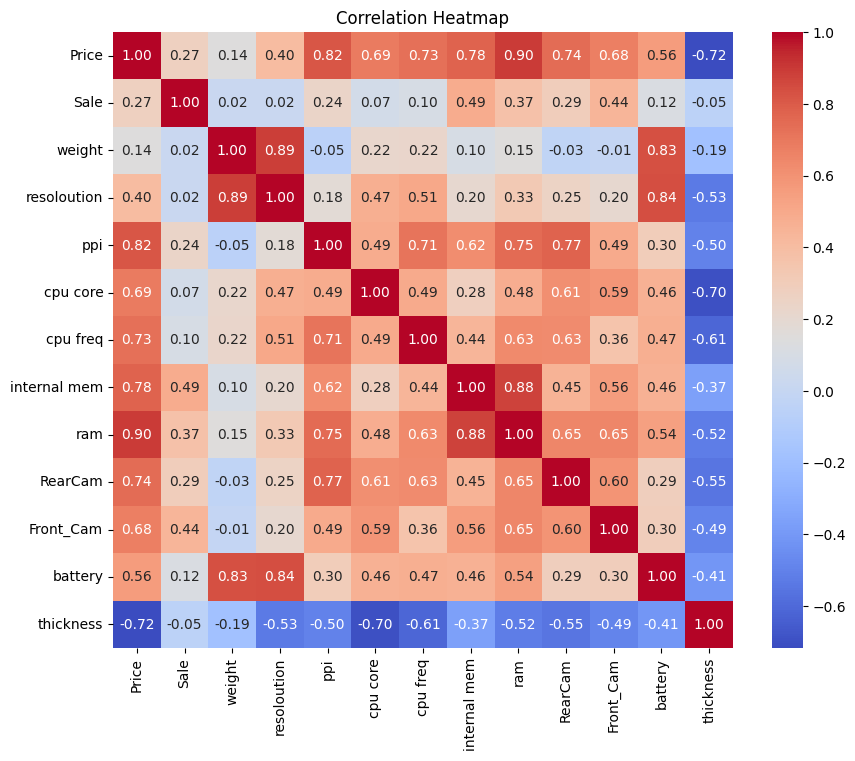

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix between features
correlation_matrix = data.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the plot
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


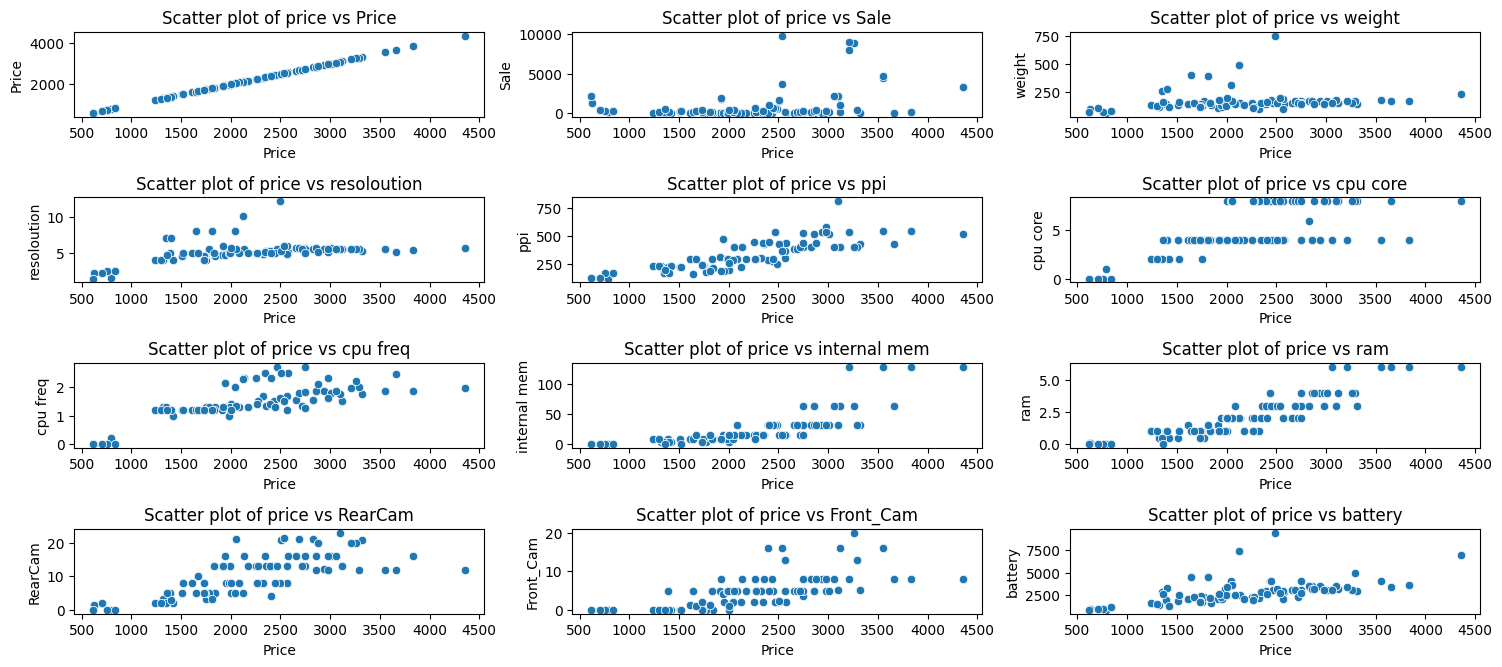

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get all column names except 'price'
features = data.columns[:-1]

# Set the figure size
plt.figure(figsize=(15, 8))

# Define the number of rows and columns for subplots
rows = len(features) // 3 + 1
cols = 3

# Plot scatter plots using nested loops
for i, feature in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(x='Price', y=feature, data=data)
    plt.title('Scatter plot of price vs {}'.format(feature))

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()




In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Import necessary libraries

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the dataset using MinMaxScaler, excluding the 'Price' column
normalized_data = data.copy()
columns_to_normalize = data.columns[data.columns != 'Price']
normalized_data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Split features and target variable
X = normalized_data.drop(columns=['Price'])  # Features
y = normalized_data['Price']  # Target variable

<div style="text-align:center;">
    <img src="图片1.png" alt="Mobile Phone" style="width:50%;">
    <div style="text-align:center;">process of our work</div>
</div>


# model selection

<div style="text-align:center;">
    <img src="258589390-8d815058-ece8-48b9-a94e-0e1ab53ea0f6.png" alt="Mobile Phone" style="width:50%;">
    <div style="text-align:center;">K-fold cross-validation method</div>
</div>

In [27]:
def gridding_search(X, y, test_size):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize linear regression model with standard scaling
    model = make_pipeline(StandardScaler(), LinearRegression())

    # Perform cross-validation and calculate evaluation metrics
    r_squared_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    mse_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
    rmse_scores = np.sqrt(mse_scores)

    # Find the index of the highest R-squared score
    best_model_index = np.argmax(r_squared_scores)

    # Train the best model on the entire dataset
    model = model.fit(X, y)

    print("Best k-fold:", best_model_index)
    print("CV: R-squared score of the best model:", r_squared_scores[best_model_index])
    print("CV: Mean Squared Error:", mse_scores[best_model_index])
    print("CV: Mean Absolute Error:", mae_scores[best_model_index])
    print("CV: Root Mean Squared Error:", rmse_scores[best_model_index])

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics on the test set
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return [model, X_train, X_test, y_train, y_test, y_pred, mse, mae, rmse, r2]

# Perform grid search
model, X_train, X_test, y_train, y_test, y_pred, mse, mae, rmse, r2 = gridding_search(X, y, 0.2)

# Print evaluation metrics
print(f"Evaluation: \tMSE: {mse}\tMAE: {mae}\tRMSE: {rmse}\tR-square: {r2}")


Best k-fold: 6
CV: R-squared score of the best model: 0.9701964459772768
CV: Mean Squared Error: 18095.550140105035
CV: Mean Absolute Error: 114.57513006006512
CV: Root Mean Squared Error: 134.5197016801072
Evaluation: 	MSE: 19292.0675109018	MAE: 117.1183951953466	RMSE: 138.89588730737063	R-square: 0.9659685291483076


In [28]:
# Coefficients
coefficients = model.named_steps['linearregression'].coef_
print("Coefficients:", coefficients)

# Intercept
intercept = model.named_steps['linearregression'].intercept_
print("Intercept:", intercept)


Coefficients: [ -35.07100445  -35.15399368 -116.79590227  135.17584871  131.51980208
   78.86027465  179.46774186  149.57472244   31.09086175   38.82013625
  171.55558953 -161.06491518]
Intercept: 2215.5962732919256


### Hypothesis Testing: Is there a linear relationship between X and y? (F-test)

**Null Hypothesis (H0):** There is no linear relationship between X and y.  
$$ H_0: \beta_i = 0 \text{ for every } i \text{ for } X_i $$

**Alternative Hypothesis (H1):** There is a linear relationship between X and y.  
$$ H_1: \text{at least there is one } \beta_i \neq 0 \text{ for every } i \text{ for } X_i $$




In [29]:
from scipy.stats import f_oneway

# Perform F-test for each feature
f_test_results = {}
for feature in X.columns:
    f_statistic, p_value = f_oneway(X[feature], y)
    f_test_results[feature] = {'F-statistic': f_statistic, 'p-value': p_value}

# Print F-test results
for feature, result in f_test_results.items():
    print(f"{feature}, F-statistic: {result['F-statistic']}, p-value: {result['p-value']}")
    # Print conclusion based on F-test results

Sale, F-statistic: 1339.2095603124785, p-value: 2.1628596806513534e-116
weight, F-statistic: 1339.1012704388884, p-value: 2.1855814478682114e-116
resoloution, F-statistic: 1338.8585732875977, p-value: 2.237381321969228e-116
ppi, F-statistic: 1338.9072213942443, p-value: 2.2269000804521677e-116
cpu core, F-statistic: 1338.55094806135, p-value: 2.3048184345249923e-116
cpu freq, F-statistic: 1338.6121306316693, p-value: 2.291245071241859e-116
internal mem, F-statistic: 1339.0535475531046, p-value: 2.1956709388534757e-116
ram, F-statistic: 1338.840652906854, p-value: 2.2412547691970284e-116
RearCam, F-statistic: 1338.7394450128854, p-value: 2.2632576260060854e-116
Front_Cam, F-statistic: 1339.0127742722052, p-value: 2.20432827631067e-116
battery, F-statistic: 1339.001256384062, p-value: 2.206780070639479e-116
thickness, F-statistic: 1338.940231759018, p-value: 2.2198161433901652e-116


In [30]:
from scipy.stats import f

# Calculate F-critical value
alpha = 0.05  # significance level
dfn = 13  # degrees of freedom numerator
dfd = len(X) - 2  # degrees of freedom denominator
F_critical = f.ppf(1 - alpha, dfn, dfd)
F_critical

1.7821592121402092

In [31]:
    
for feature, result in f_test_results.items():
    if result['p-value'] < 0.05:
        print(f"Feature '{feature}' has a significant linear relationship with the target variable.\n")
    else:
        print(f"Feature '{feature}' does not have a significant linear relationship with the target variable.\n")


Feature 'Sale' has a significant linear relationship with the target variable.

Feature 'weight' has a significant linear relationship with the target variable.

Feature 'resoloution' has a significant linear relationship with the target variable.

Feature 'ppi' has a significant linear relationship with the target variable.

Feature 'cpu core' has a significant linear relationship with the target variable.

Feature 'cpu freq' has a significant linear relationship with the target variable.

Feature 'internal mem' has a significant linear relationship with the target variable.

Feature 'ram' has a significant linear relationship with the target variable.

Feature 'RearCam' has a significant linear relationship with the target variable.

Feature 'Front_Cam' has a significant linear relationship with the target variable.

Feature 'battery' has a significant linear relationship with the target variable.

Feature 'thickness' has a significant linear relationship with the target variable.



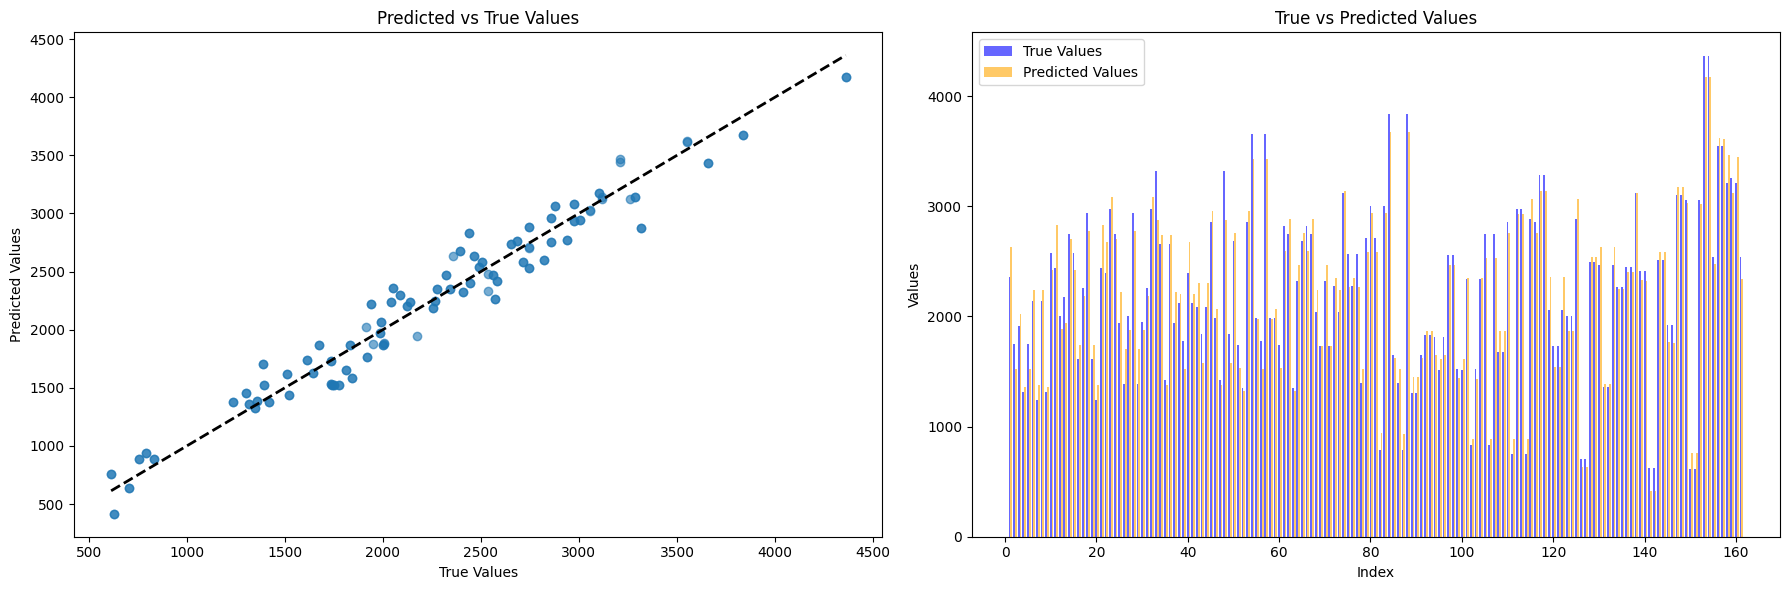

In [32]:
import matplotlib.pyplot as plt

# Calculate predictions
y_pred = model.predict(X)

# Generate indices for the bar plot
indices = range(1, len(y) + 1)

# Plot predicted vs true values and error scatter plot
plt.figure(figsize=(18, 6))

# Subplot 1: Predicted vs True Values
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Subplot 2: Bar Plot of True and Predicted Values
plt.subplot(1, 2, 2)
plt.bar(indices, y, width=0.4, label='True Values', color='blue', alpha=0.6)
plt.bar([idx + 0.4 for idx in indices], y_pred, width=0.4, label='Predicted Values', color='orange', alpha=0.6)
plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()


plt.tight_layout()
plt.show()



### Predicitons 

In [33]:
np.mean(data)

Price           2215.596273
Sale             621.465839
weight           170.426087
resoloution        5.209938
ppi              335.055901
cpu core           4.857143
cpu freq           1.502832
internal mem      24.501714
ram                2.204994
RearCam           10.378261
Front_Cam          4.503106
battery         2842.111801
thickness          8.921739
dtype: float64

In [34]:
xiaomi=[300, 160,5.209938,335.055901,4.857143,1.502832,128,12, 8,16,5000,8.921739]

# Convert the normalized data to DataFrame format
xiaomi_df = pd.DataFrame([xiaomi], columns=columns_to_normalize)

# Use the same MinMaxScaler object for normalization
xiaomi_normalized = scaler.transform(xiaomi_df)

# Convert the normalized data to DataFrame format
xiaomi_normalized_df = pd.DataFrame(xiaomi_normalized, columns=columns_to_normalize)

y_p=model.predict(xiaomi_normalized_df)
y_p


array([4149.41591292])

In [35]:
# Residuals
residuals = y - model.predict(X)  # y and X are the labels and features of the training data
mse = np.mean(residuals**2)  # Mean Squared Error

# Matrix calculation
X_design = np.c_[np.ones(X.shape[0]), X]  # Add intercept term
H = X_design @ np.linalg.inv(X_design.T @ X_design) @ X_design.T  # Leverage matrix
hii = H.diagonal()[0]  # Leverage values for new data points

# Degrees of freedom
df = len(y) - X_design.shape[1]

# Calculation of standard error
se = math.sqrt(mse * (1 + hii))

# t value
alpha = 0.05
t_value = t.ppf(1 - alpha / 2, df)

# Confidence interval
confidence_interval = (y_p - t_value * se, y_p + t_value * se)

# Output confidence interval
print("The 95% confidence interval is:", confidence_interval)


The 95% confidence interval is: (array([3816.82678775]), array([4482.00503809]))
